In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


'Fe Male'로 저장되어 있는 값들 'Female'로 변경
train_df.loc[train_df['Gender'] == 'Fe Male', 'Gender'] = 'Female'

1. 결측치 
- Age(37)
- TypeofContact(범주형) -> 'Unknown'으로 대체
- DurationOfPitch(9 / 평균 / 중앙값 중 성능 좋은 것으로)
- NumberOfFollowups(4)
- PreferredPropertyStar(3)
- NumberOfTrips(3)
- NumberOfChildrenVisiting(1)
- MonthlyIncome (평균)

2. 이상치
- 그대로

### 결측치 처리

train

In [4]:
train_df['Age'] = train_df['Age'].fillna(37)
train_df['DurationOfPitch'] = train_df['DurationOfPitch'].fillna(9)
train_df['TypeofContact'] = train_df['TypeofContact'].fillna("Unknown")
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].fillna(4)
train_df['PreferredPropertyStar'] = train_df['PreferredPropertyStar'].fillna(3)
train_df['NumberOfTrips'] = train_df['NumberOfTrips'].fillna(3)
train_df['NumberOfChildrenVisiting'] = train_df['NumberOfChildrenVisiting'].fillna(1)
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(23624.108894878707)

# train Income에 대해서만 이상치 처리해주기
b = train_df[train_df['MonthlyIncome'] >= 35000].index
train_df.drop(b, inplace=True)

test

In [5]:
test_df['Age'] = test_df['Age'].fillna(37)
test_df['DurationOfPitch'] = test_df['DurationOfPitch'].fillna(9)
test_df['TypeofContact'] = test_df['TypeofContact'].fillna("Unknown")
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].fillna(4)
test_df['PreferredPropertyStar'] = test_df['PreferredPropertyStar'].fillna(3)
test_df['NumberOfTrips'] = test_df['NumberOfTrips'].fillna(3)
test_df['NumberOfChildrenVisiting'] = test_df['NumberOfChildrenVisiting'].fillna(1)
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(23624.108894878707)

### 문자형 변수 처리

train

이진 변수

In [6]:
# 교육 수준을 세 그룹으로 세분화
train_df["MaritalStatus"]=train_df["MaritalStatus"].replace({"Divorced":"Unmarried","Single":"Unmarried"})
train_df["MaritalStatus"]=train_df["MaritalStatus"].replace({"Unmarried":0,"Married":1})

In [7]:
train_df["Gender"]=train_df["Gender"].replace({"Fe Male":"Female"})
train_df["Gender"]=train_df["Gender"].replace({"Female":0,"Male":1})

라벨인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder
object_columns= ['Designation','ProductPitched']
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_df[o_col])
    train_df[o_col] = encoder.transform(train_df[o_col])

원핫인코딩

In [9]:
train_dummies=pd.get_dummies(train_df[['TypeofContact','Occupation']],drop_first=True)

In [10]:
train_df.drop(['TypeofContact','Occupation'],axis=1, inplace=True)

In [11]:
train_df1 = pd.concat([train_df,train_dummies], axis=1)

test

이진변수

In [12]:
# 교육 수준을 세 그룹으로 세분화
test_df["MaritalStatus"]=test_df["MaritalStatus"].replace({"Divorced":"Unmarried","Single":"Unmarried"})
test_df["MaritalStatus"]=test_df["MaritalStatus"].replace({"Unmarried":0,"Married":1})

In [13]:
test_df["Gender"]=test_df["Gender"].replace({"Fe Male":"Female"})
test_df["Gender"]=test_df["Gender"].replace({"Female":0,"Male":1})

라벨인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder
object_columns= ['Designation','ProductPitched']
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(test_df[o_col])
    test_df[o_col] = encoder.transform(test_df[o_col])

원핫인코딩

In [15]:
test_dummies=pd.get_dummies(test_df[['TypeofContact','Occupation']],drop_first=True)

In [16]:
test_df.drop(['TypeofContact','Occupation'],axis=1, inplace=True)

In [17]:
test_df1 = pd.concat([test_df,test_dummies], axis=1)

### skew

In [18]:
numeric_cols = train_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

       
for col in numeric_cols:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df1[col].skew()) 
         )

id              Skewness: 00.00
Age             Skewness: 00.43
CityTier        Skewness: 00.76
DurationOfPitch Skewness: 00.97
Gender          Skewness: -0.48
NumberOfPersonVisiting Skewness: 00.05
NumberOfFollowups Skewness: -0.43
PreferredPropertyStar Skewness: 00.92
MaritalStatus   Skewness: 00.06
NumberOfTrips   Skewness: 01.15
Passport        Skewness: 00.92
PitchSatisfactionScore Skewness: -0.12
OwnCar          Skewness: -0.47
NumberOfChildrenVisiting Skewness: 00.26
MonthlyIncome   Skewness: 00.72
ProdTaken       Skewness: 01.50


In [19]:
numeric_cols = test_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
       
for col in numeric_cols:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(test_df1[col].skew()) 
         )

id              Skewness: 00.00
Age             Skewness: 00.42
CityTier        Skewness: 00.72
DurationOfPitch Skewness: 02.26
Gender          Skewness: -0.34
NumberOfPersonVisiting Skewness: 00.03
NumberOfFollowups Skewness: -0.33
PreferredPropertyStar Skewness: 00.88
MaritalStatus   Skewness: 00.10
NumberOfTrips   Skewness: 01.69
Passport        Skewness: 00.92
PitchSatisfactionScore Skewness: -0.13
OwnCar          Skewness: -0.50
NumberOfChildrenVisiting Skewness: 00.31
MonthlyIncome   Skewness: 01.03


### minmaxscaler

train

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])
train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])

test

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])
test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])

### 상관계수

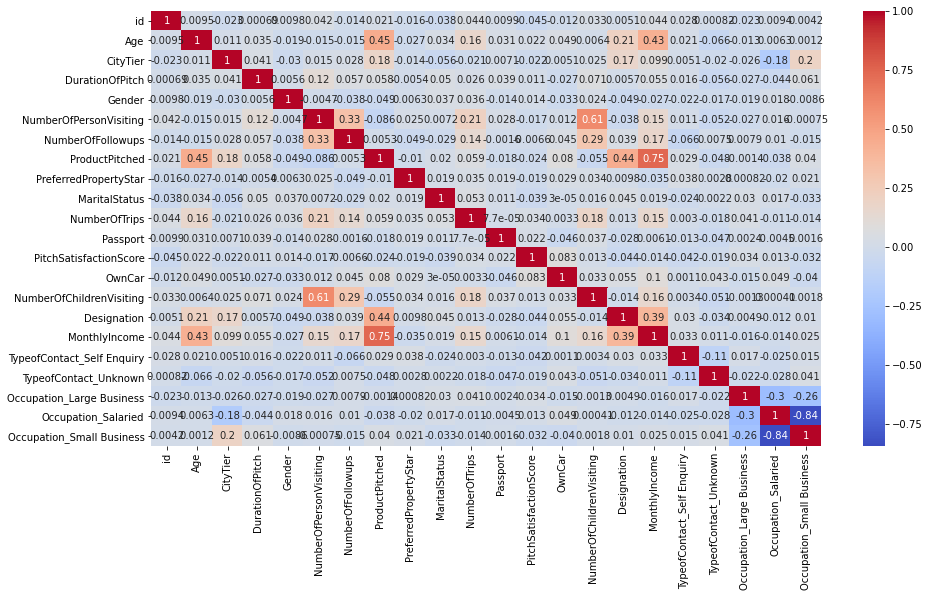

In [22]:
cols = test_df1.columns
corr = train_df1[cols].corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

### 모델 돌려보기

In [48]:
from sklearn.model_selection import train_test_split
X= train_df1.drop(columns=['ProdTaken','id'])
y = train_df1[['ProdTaken']] 

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

### 1. KNN (K-Nearest Neighbor)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [50]:
knn.fit(X_train, y_train)

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = knn.predict(X_valid)

In [52]:
y_preds = y_valid.copy()
y_preds['ProdTaken'] = y_pred

In [53]:
print("prediction accuracy: {:.2f}".format(np.mean(y_preds['ProdTaken'] == y_valid['ProdTaken'])))

prediction accuracy: 0.79


하이퍼파라미터 튜닝

In [30]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

파라미터

n_neighbors: 검색할 이웃의 수로 default 값은 5이다.

Metric: 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowsi이다

Weights: 예측에 사용하는 가중치로 uniform 은 각 이웃에 동일한 가중치를 , ‘distance’는 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 영향을 미친다.

In [31]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_valid, y_valid))

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score :  0.8524832214765101
Best Test Score :  0.8133333333333334


In [32]:
test_df1.drop(columns=['id'],inplace=True)
test_df1.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,...,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,0.325581,3,0.032787,1,2,5.0,1,3.0,1,1.0,...,2,0,1.0,2,0.440895,0,0,0,0,1
1,0.651163,2,0.049180,1,3,4.0,1,4.0,1,1.0,...,5,0,1.0,2,0.451278,1,0,0,0,1
2,0.441860,3,0.139344,1,3,4.0,1,3.0,1,5.0,...,5,1,0.0,2,0.489897,1,0,0,0,1
3,0.581395,1,0.254098,1,3,6.0,1,3.0,0,6.0,...,3,1,2.0,2,0.537428,1,0,0,0,1
4,0.162791,3,0.016393,0,4,4.0,0,4.0,0,3.0,...,4,1,3.0,1,0.505956,1,0,1,0,0


In [43]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1, weights = 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print("prediction accuracy: {:.2f}".format(np.mean(y_preds['ProdTaken'] == y_valid['ProdTaken'])))

prediction accuracy: 0.84


C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 8, weights = 'distance')
knn.fit(X, y)
y_pred = knn.predict(test_df1)

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [38]:
sample_submission['ProdTaken'] = y_pred
sample_submission.to_csv('submission.csv',index = False)

### 2.  Ada Boost Classifier

간단한 약분류기들이 상호보완 하도록 단계적으로 학습, 이들을 조합해 최종 강분류기의 성능을 증폭시킨다 

Step 1) 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류

Step 2) 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)

Step 3) 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류

Step 4) 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)

Step 5) 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음

Step 6) 마지막으로 분류기들을 결합하여 최종 예측 수행

→ 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦

In [39]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,  learning_rate=1)

_estimators를 늘린다면
생성하는 weak learner의 수는 늘어남
이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해짐

-learning_rate을 줄인다면
가중치 갱신의 변동폭이 감소해서, 여러 학습기들의 decision boundary 차이가 줄어듦

이 둘은 trade-off 관계이다

In [40]:
from sklearn import metrics
model = abc.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = model.predict(X_valid)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.84


In [41]:
y_preds = y_valid.copy()
y_pred = model.predict(X_valid)
y_preds['ProdTaken'] = y_pred
print("prediction accuracy: {:.2f}".format(np.mean(y_preds['ProdTaken'] == y_valid['ProdTaken'])))

prediction accuracy: 0.84


In [44]:
train_df1['NumberOfChildrenVisiting'].value_counts()

1.0    807
2.0    527
0.0    415
3.0    124
Name: NumberOfChildrenVisiting, dtype: int64

In [45]:
test_df1['NumberOfChildrenVisiting'].value_counts()

1.0    1300
2.0     776
0.0     666
3.0     191
Name: NumberOfChildrenVisiting, dtype: int64

In [46]:
train_df1["children"]=train_df1['NumberOfChildrenVisiting'].replace({1:1,2:1,3:1,0:0})
test_df1["children"]=test_df1['NumberOfChildrenVisiting'].replace({1:1,2:1,3:1,0:0})

In [47]:
test_df1["children"].value_counts()

1.0    2267
0.0     666
Name: children, dtype: int64